In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, os.path
import pickle

from matplotlib.pyplot import figure

figsize=(10, 6)

In [159]:
columns = [
    'AGENT_ID',
    'NTH_EPISODE',
    'STEPS_TAKEN',
    'TOTAL_REWARD',
    'MOVING_AVERAGE_REWARD',
    'SOLVED',
]

path, dirs, files = next(os.walk("./data"))
n_agents = len(files)

print(n_agents)
agent_dfs = []
for agent_id in range(n_agents):
    agent_dfs.append(pd.read_pickle('./data/data_ddpg_agent{}.pk1'.format(agent_id)).reset_index(drop=True))

solved = []
not_solved = []
for agent_id in range(n_agents):
    if agent_dfs[agent_id][agent_dfs[agent_id]['SOLVED'] == 1].empty:
        not_solved.append(agent_id)
    else:
        solved.append(agent_id)

number_solved = len(solved)

percentage_solved = (number_solved/n_agents)*100

print("{}% Solved".format(percentage_solved))

5
60.0% Solved


2
3


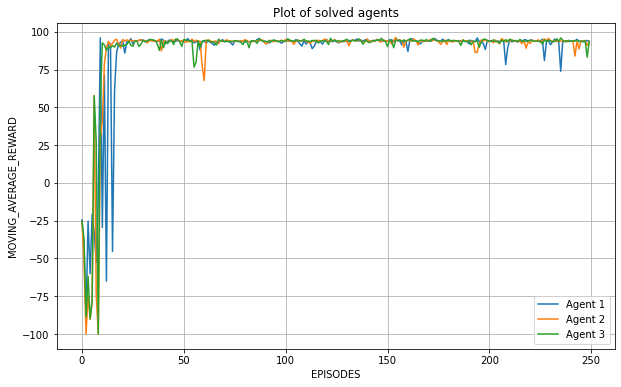

In [160]:
for agent_id in solved:
    ax = agent_dfs[agent_id]['TOTAL_REWARD'].plot(
        label = "Agent " + str(agent_id),
        legend=True,
        figsize=figsize,
        grid = True,
        title = "Plot of solved agents"
    )
    ax.set_xlabel("EPISODES")
    ax.set_ylabel("MOVING_AVERAGE_REWARD")

df = agent_dfs[0]['MOVING_AVERAGE_REWARD']
new_df = pd.DataFrame(df)

for agent_id in solved[1:]:
    print(agent_id)
    name = 'MOVING_AVERAGE_REWARD' + str(agent_id)
    new_df[name] = pd.DataFrame(agent_dfs[agent_id]['MOVING_AVERAGE_REWARD'])

new_df['mean'] = new_df.mean(axis=1)

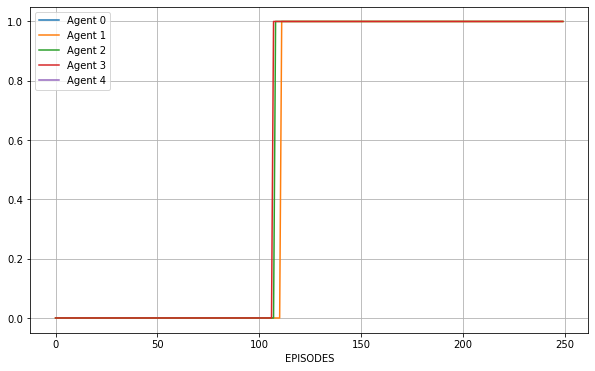

In [161]:
for agent_id in range(n_agents):
    ax = agent_dfs[agent_id]['SOLVED'].plot(
        label = "Agent " + str(agent_id),
        legend = True,
        figsize=figsize,
        grid = True
    )

    ax.set_xlabel("EPISODES")

In [162]:
agent_dfs[1][agent_dfs[1]['TOTAL_REWARD'] == min(agent_dfs[1]['TOTAL_REWARD'])]

,AGENT_ID,NTH_EPISODE,STEPS_TAKEN,TOTAL_REWARD,MOVING_AVERAGE_REWARD,SOLVED
2,1.0,2.0,999.0,-89.205929,-51.628244,0.0


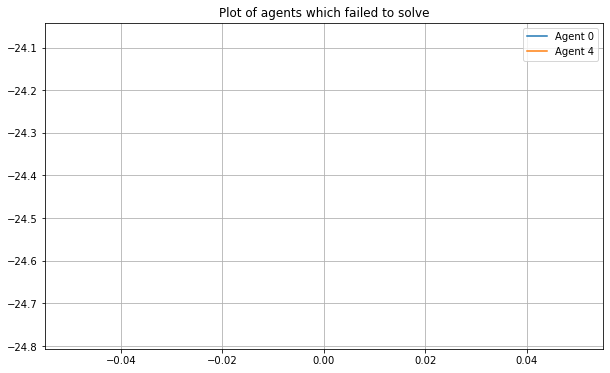

In [163]:
for agent_id in not_solved:
    agent_dfs[agent_id]['TOTAL_REWARD'].plot(
        label = "Agent " + str(agent_id),
        legend=True,
        figsize=figsize,
        grid = True,
        title="Plot of agents which failed to solve"
    )

<AxesSubplot:title={'center':'Plot of agents which failed to solve'}>

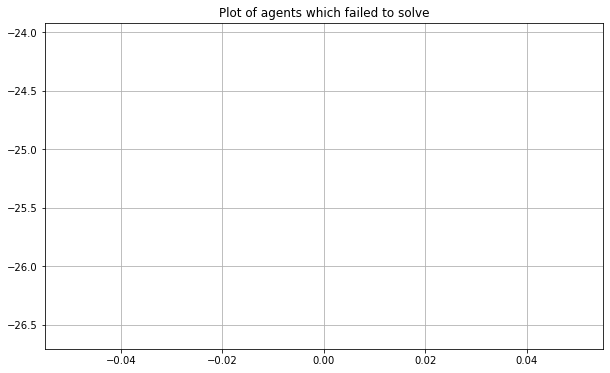

In [164]:
new_df['mean'].plot(
        figsize=figsize,
        grid = True,
        title="Plot of agents which failed to solve"
)

<AxesSubplot:title={'center':'Plot of agents which failed to solve'}>

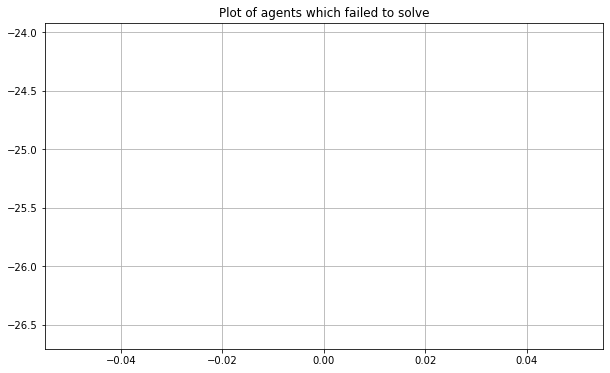

In [165]:
new_df['mean'].plot(
        figsize=figsize,
        grid = True,
        title="Plot of agents which failed to solve"
)


<AxesSubplot:title={'center':'Plot of agents which failed to solve'}>

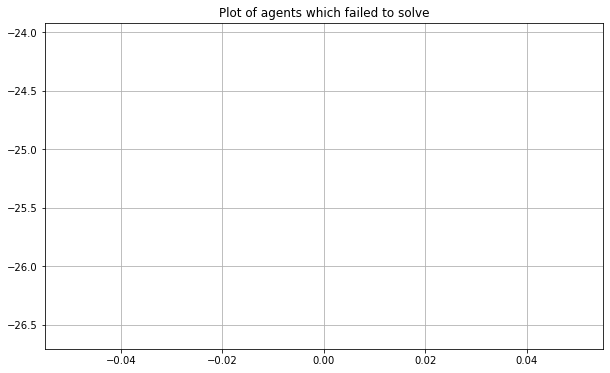

In [166]:
new_df['mean'].plot(
        figsize=figsize,
        grid = True,
        title="Plot of agents which failed to solve"
)

